# Pós Graduação em Ciência de Dados e Big Data PUC Minas Uberlândia
## ILE - Introdução às Linguagens Estatísticas
**Aluno**: Herculano Cunha


## Índice
* [1. O Básico de Python](#1.-O-Básico-de-Python)
* [2. Variáveis](#2.-Variáveis)
* [3. Operadores de Comparação](#3.-Operadores-de-Comparação)
* [4. Variáveis do tipo *string*](#4.-Variáveis-do-tipo-string)
    * [4.1 Operações com string](#4.1-Operações-com-string)

In [21]:
import pandas as pd
import calendar as cal
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [22]:
pessoa_df = pd.read_csv('./dados/tab_pessoa.csv',encoding='utf-8',sep=';')
unidade_df = pd.read_csv('./dados/tab_unidade.csv',encoding='utf-8',sep=';')
cidade_df = pd.read_csv('./dados/tab_cidade.csv',encoding='utf-8',sep=';')
item_df = pd.read_csv('./dados/tab_item.csv',encoding='utf-8',sep=';')
pre_venda_df = pd.read_csv('./dados/tab_pre_venda.csv',encoding='utf-8',sep=';')
item_pre_venda_df = pd.read_csv('./dados/tab_item_pre_venda.csv',encoding='utf-8',sep=';')
print("Terminado")

Terminado


In [71]:
#today = datetime.strptime('01/10/2017 11:13','%d/%m/%Y %I:%M')
#print(today.strftime('%b %Y'))
#print(today)


2017-10-01 11:13:00


In [23]:
#Adicionando uma formatação para a data de emissão para fazer agrupamento
pre_venda_df['mes_num'] =  pre_venda_df.apply(lambda row: datetime.strptime(row['dta_emissao'],'%d/%m/%Y 00:00').strftime('%m'), axis=1)
#Convertendo os valores em decimal com ponto
pre_venda_df['val_total_pre_venda'] =  pre_venda_df.apply(lambda row: float(str(row['val_total_pre_venda']).replace(',','.')), axis=1)

In [24]:
pre_venda_df2 = pre_venda_df.join(pessoa_df.set_index('cod_pessoa'), on='cod_pessoa_cliente')

In [25]:
#Agrupamneto e soma das vendas por mes
soma_mensal_df = pre_venda_df2.groupby(['mes_num'])[['val_total_pre_venda']].sum()

#Agrupamneto e soma das vendas por cliente
soma_cliente_df = pre_venda_df2.groupby(['nom_pessoa'])[['val_total_pre_venda']].sum()

In [35]:
soma_mensal_df2= soma_mensal_df.add_suffix('_soma').reset_index()
print(soma_mensal_df2)

  mes_num  val_total_pre_venda_soma
0      01                3125838.00
1      02                4858180.23
2      03                4558681.21
3      04                6370105.29
4      05                9977825.95
5      06               10202588.30
6      07                7792993.43
7      08                6408253.00


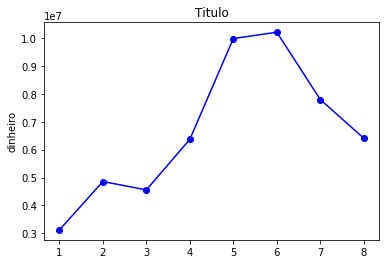

In [36]:
plt.plot(soma_mensal_df2['mes_num'],soma_mensal_df2['val_total_pre_venda_soma'], color='blue', marker='o', linestyle='solid')
plt.title("Titulo")
plt.ylabel("dinheiro")
plt.show()